In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_validate,validation_curve
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("employeePromotion.csv")
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
cols = ['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met', 'awards_won',
       'avg_training_score', 'is_promoted']
df.columns = cols

In [4]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [5]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met                   0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

In [6]:
df.previous_year_rating.value_counts(dropna=False)

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
NaN     4124
Name: count, dtype: int64

In [7]:
service_filter = df[df.length_of_service == 1]
print(
    "Null rating counts of employees with length of service 1\n",
    service_filter.previous_year_rating.isnull().sum()
)
print(
    "Null rating counts of employees with length of service 1 and promoted\n",
    service_filter[service_filter.is_promoted == 1].previous_year_rating.isnull().sum()
)
df.previous_year_rating = df.previous_year_rating.fillna(0)

Null rating counts of employees with length of service 1
 4124
Null rating counts of employees with length of service 1 and promoted
 339


In [8]:
df[df.education.isna()].is_promoted.value_counts()

is_promoted
0    2287
1     122
Name: count, dtype: int64

In [9]:
depts = df.department.unique()

for dept in depts:
    edu = df[df.department == dept].education.mode()[0]
    print(dept," : ",edu)

Sales & Marketing  :  Bachelor's
Operations  :  Bachelor's
Technology  :  Bachelor's
Analytics  :  Bachelor's
R&D  :  Bachelor's
Procurement  :  Bachelor's
Finance  :  Bachelor's
HR  :  Bachelor's
Legal  :  Bachelor's


In [10]:
df.education = df.education.fillna(df.education.mode()[0])

In [11]:
df.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        6
length_of_service          35
KPIs_met                    2
awards_won                  2
avg_training_score         61
is_promoted                 2
dtype: int64

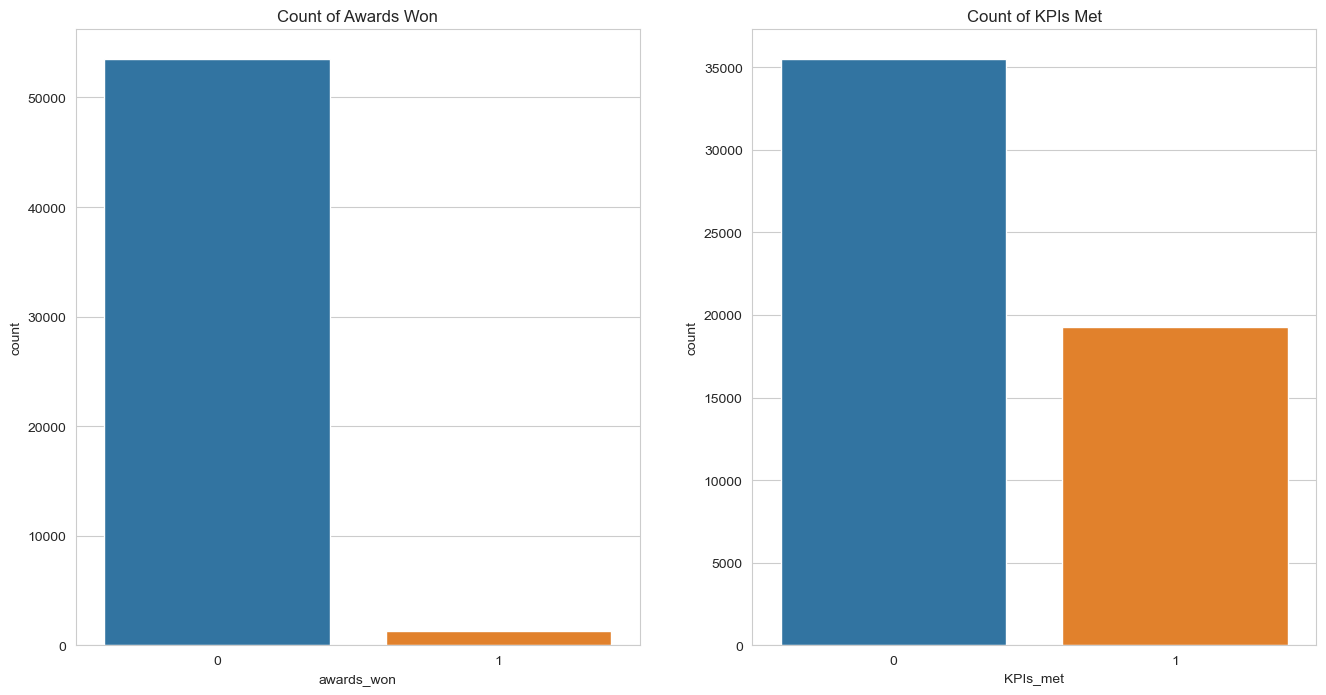

In [12]:
# Reset any previous styling
plt.style.use('default')
sns.set_style('whitegrid')

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot count of awards won
sns.countplot(data=df, x='awards_won', ax=axes[0])
axes[0].set_title('Count of Awards Won')

# Plot count of KPIs met
sns.countplot(data=df, x='KPIs_met', ax=axes[1])
axes[1].set_title('Count of KPIs Met')

# Show the plots
plt.show()

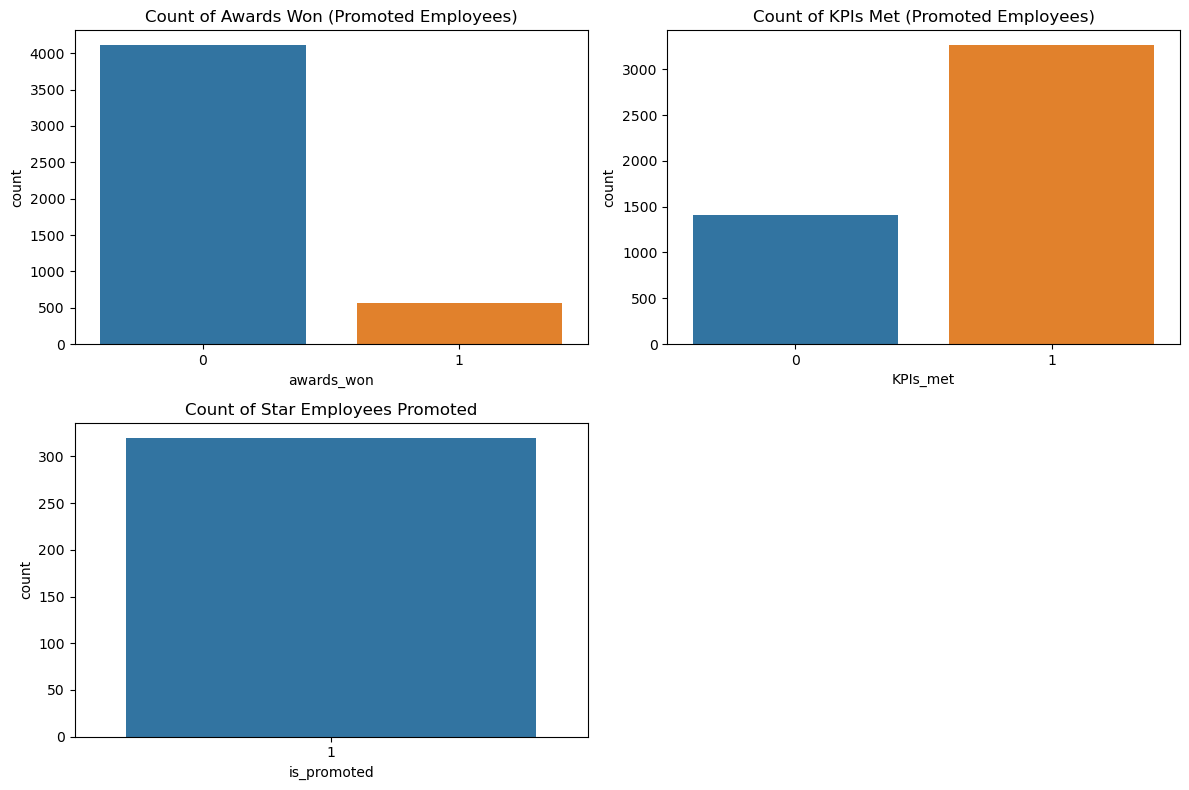

In [13]:
# Reset any previous styling
plt.style.use('default')
# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Filter the DataFrame for promoted employees
promoted_df = df[df['is_promoted'] == 1]

# Plot count of awards won for promoted employees
sns.countplot(data=promoted_df, x='awards_won', ax=axes[0, 0])
axes[0, 0].set_title('Count of Awards Won (Promoted Employees)')

# Plot count of KPIs met for promoted employees
sns.countplot(data=promoted_df, x='KPIs_met', ax=axes[0, 1])
axes[0, 1].set_title('Count of KPIs Met (Promoted Employees)')

# Filter the DataFrame for employees who met both KPIs and won awards
star_emps = promoted_df[(promoted_df['KPIs_met'] == 1) & (promoted_df['awards_won'] == 1)]

# Plot count of promoted star employees
sns.countplot(data=star_emps, x='is_promoted', ax=axes[1, 0])
axes[1, 0].set_title('Count of Star Employees Promoted')

# Remove the empty subplot
fig.delaxes(axes[1, 1])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

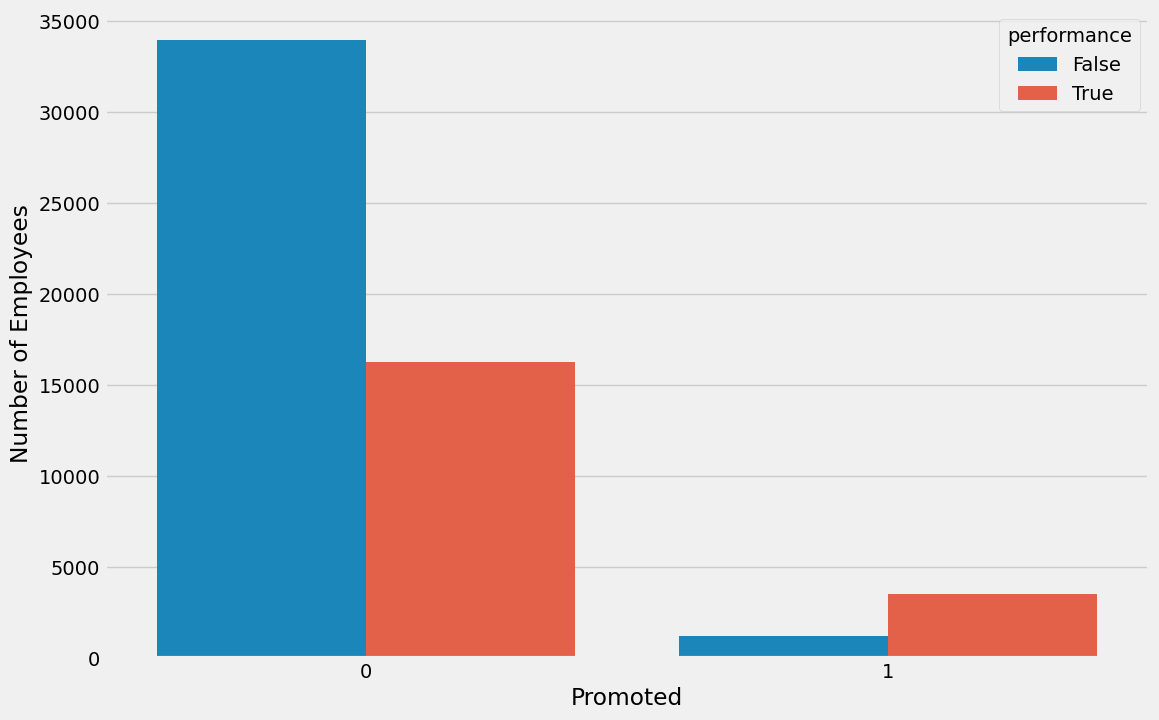

In [14]:
df['performance'] = df[['KPIs_met','awards_won']].any(axis=1,skipna=False)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.countplot(x=df.is_promoted, hue=df.performance)
plt.xlabel('Promoted')
plt.ylabel('Number of Employees')
plt.show()


In [15]:
df.gender.value_counts(normalize=True)

gender
m    0.702379
f    0.297621
Name: proportion, dtype: float64

C:\Users\parth.parikh1\AppData\Local\Temp\ipykernel_15928\1266730649.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
C:\Users\parth.parikh1\AppData\Local\Temp\ipykernel_15928\1266730649.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


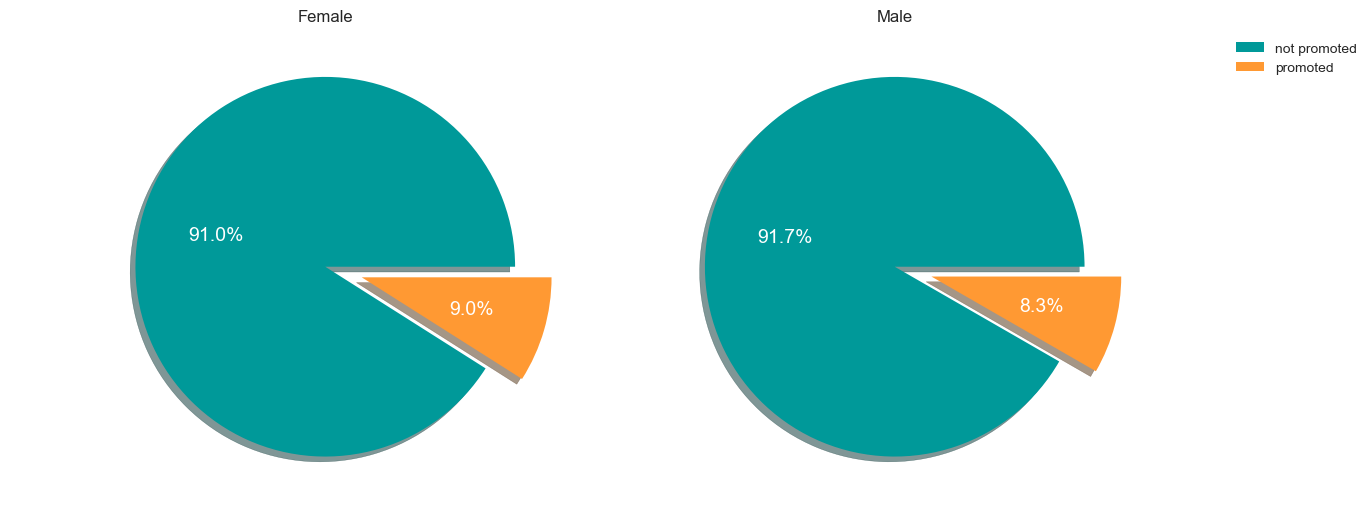

In [16]:
plt.style.use('seaborn')
plt.subplots(figsize=(12,8))
plt.subplot(1,2,1)
plt.pie(
    x=df[df.gender=='f'].is_promoted.value_counts(normalize=True),
    labels=['not promoted','promoted'],
    explode=[0,0.2],
    autopct="%1.1f%%",
    shadow=True,
    textprops=dict(color='w',fontsize=14),
    colors=['#009999','#ff9933']
)
plt.title("Female")
plt.subplot(1,2,2)
plt.pie(
    x=df[df.gender=='m'].is_promoted.value_counts(normalize=True),
    labels=['not promoted','promoted'],
    explode=[0,0.2],
    autopct="%1.1f%%",
    shadow=True,
    textprops=dict(color='w',fontsize=14),
    colors=['#009999','#ff9933']
)
plt.title("Male")
plt.legend(['not promoted','promoted'],loc='upper right', bbox_to_anchor=(1, 0.5, 0.5, 0.5))

In [17]:
df['total_score'] = df.no_of_trainings * df.avg_training_score
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted,performance,total_score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,True,49
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,False,60
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,False,50
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,False,100
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,False,73


In [18]:
df['total_score_label'] = pd.cut(df.total_score,bins=[0,65,145,1000],labels=['Low','Mediocre','High'])
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted,performance,total_score,total_score_label
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,True,49,Low
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,False,60,Low
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,False,50,Low
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,False,100,Mediocre
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,False,73,Mediocre


In [19]:
scores = df.pivot_table(values='is_promoted',index='total_score_label')
scores

,is_promoted
total_score_label,
Low,0.057549
Mediocre,0.117858
High,0.097444


Text(0.5, 0, 'score level')

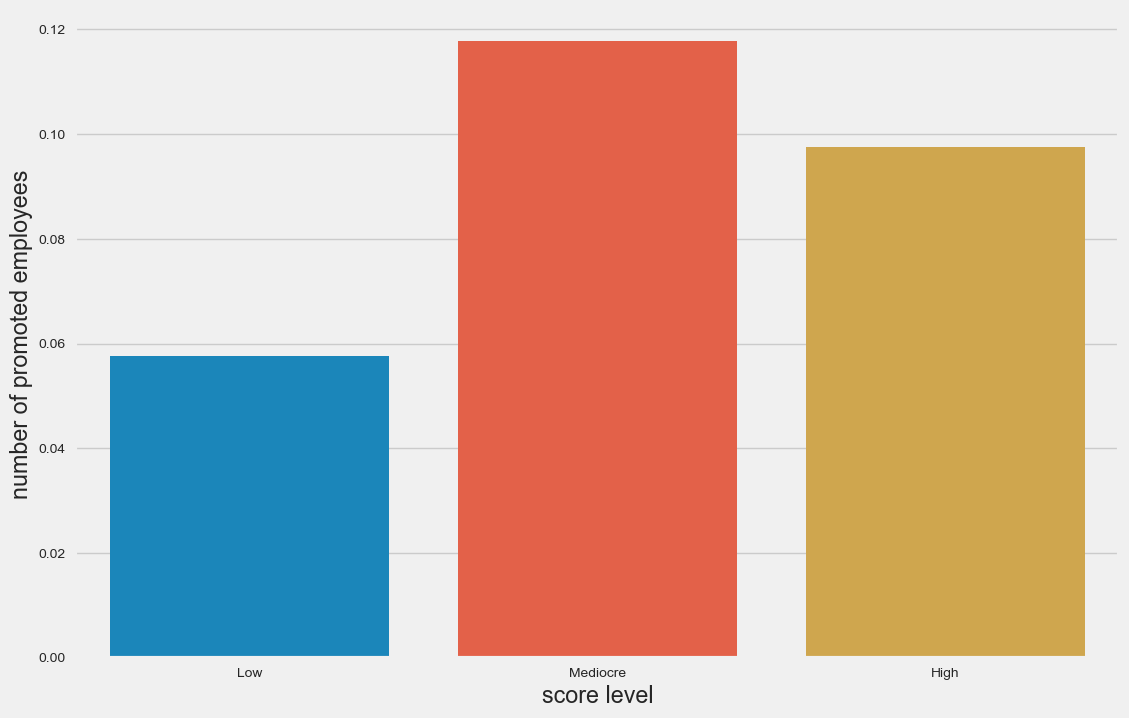

In [20]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.barplot(
    x=scores.index,
    y=scores.is_promoted
)
plt.ylabel('number of promoted employees')
plt.xlabel('score level')

In [21]:
df['service_catg'] = pd.cut(
    df.length_of_service,
    bins=[0,2,7,10,37],
    labels=['New','Established','Experienced','Veteran']
)
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted,performance,total_score,total_score_label,service_catg
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,True,49,Low,Experienced
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,False,60,Low,Established
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,False,50,Low,Established
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,False,100,Mediocre,Experienced
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,False,73,Mediocre,New


In [22]:
service = df.pivot_table(values='is_promoted',index='service_catg')
service

,is_promoted
service_catg,
New,0.086546
Established,0.084940
Experienced,0.091110
Veteran,0.075943


Text(0.5, 0, 'service category')

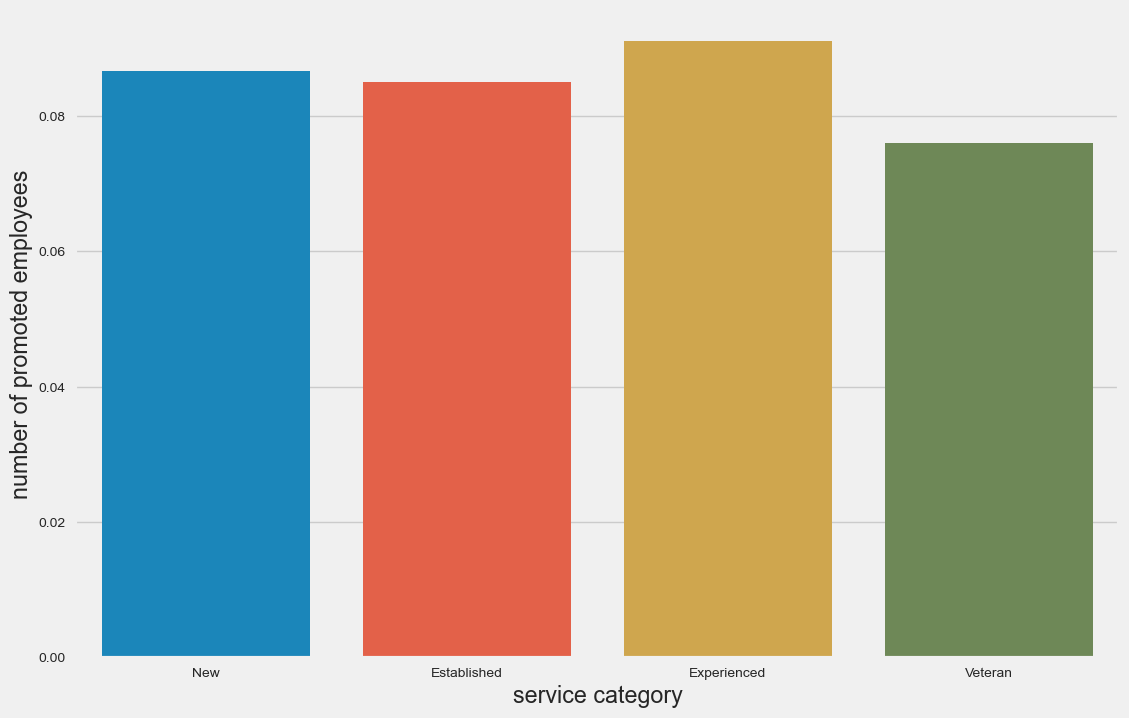

In [23]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.barplot(
    x=service.index,
    y=service.is_promoted
)
plt.ylabel('number of promoted employees')
plt.xlabel('service category')

In [24]:
df['age_label'] = pd.cut(df.age,bins=[0,25,40,50,100],labels=['Young','Middle','Senior','Elder'])
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted,performance,total_score,total_score_label,service_catg,age_label
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,True,49,Low,Experienced,Middle
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,False,60,Low,Established,Middle
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,False,50,Low,Established,Middle
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,False,100,Mediocre,Experienced,Middle
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,False,73,Mediocre,New,Senior


In [25]:
ages = df.pivot_table(values='is_promoted',index='age_label')
ages

,is_promoted
age_label,
Young,0.066357
Middle,0.090173
Senior,0.072727
Elder,0.066971


Text(0.5, 0, 'age category')

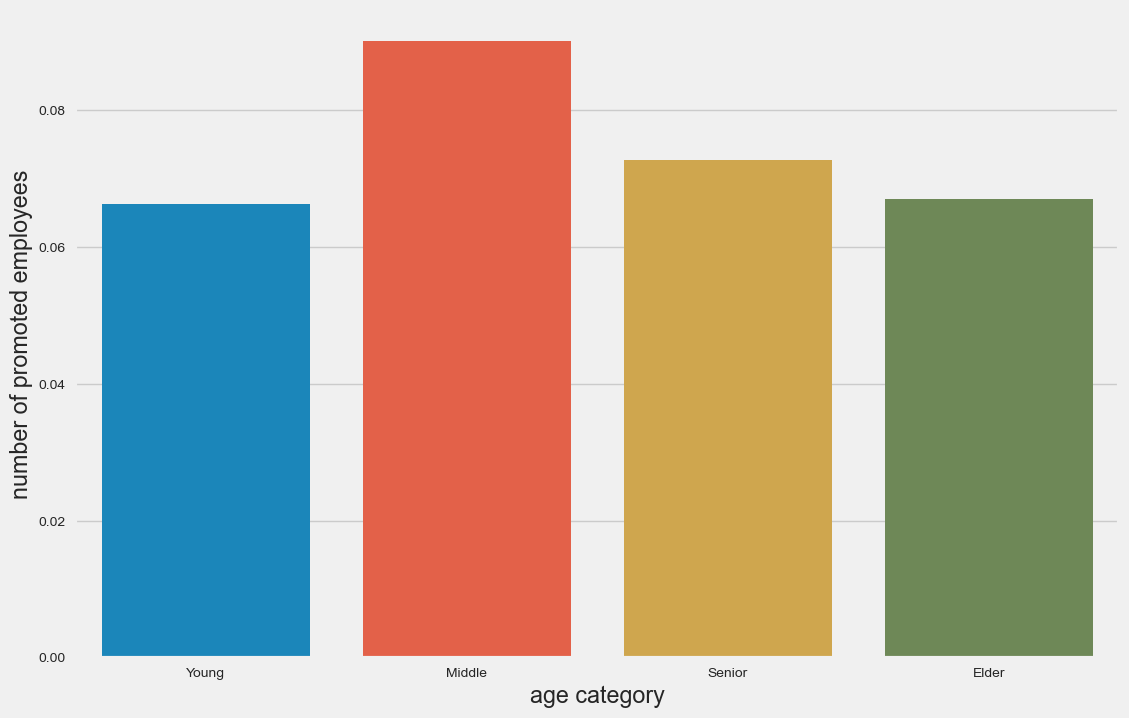

In [26]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.barplot(
    x=ages.index,
    y=ages.is_promoted
)
plt.ylabel('number of promoted employees')
plt.xlabel('age category')

In [27]:
new_emps = df[df.service_catg == 'New']

new_age = new_emps.pivot_table(values='is_promoted',index='age_label')
new_age

,is_promoted
age_label,
Young,0.066873
Middle,0.093564
Senior,0.084112
Elder,0.000000


Text(0.5, 0, 'age category')

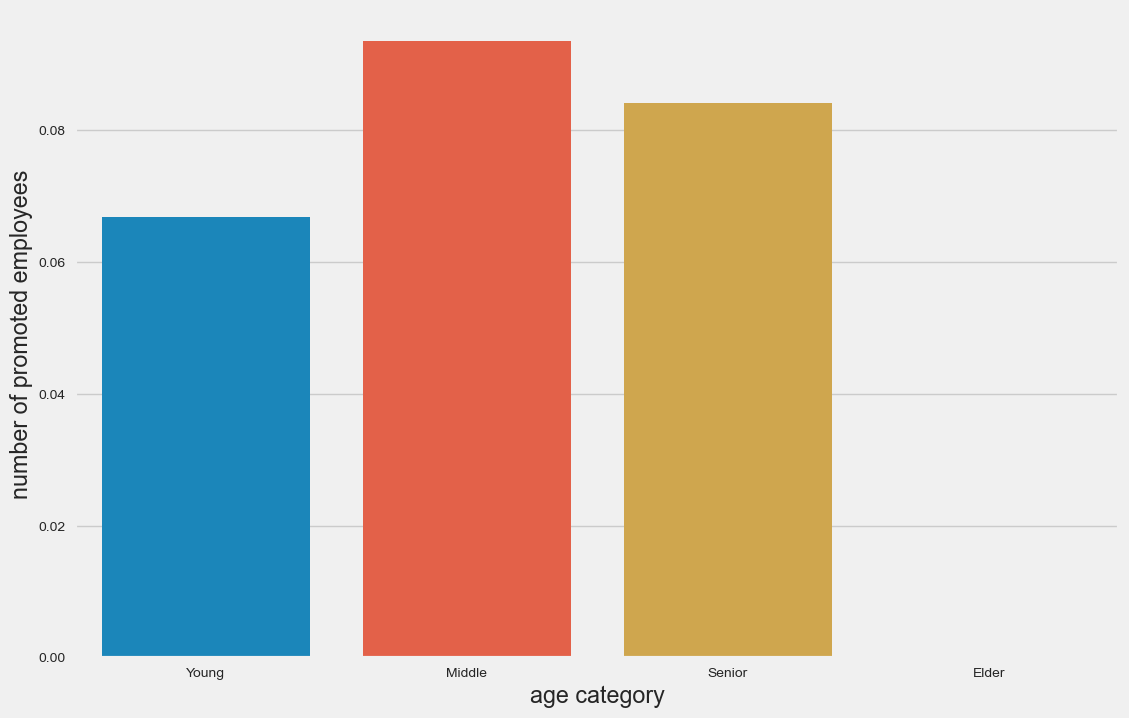

In [28]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.barplot(
    x=new_age.index,
    y=new_age.is_promoted
)
plt.ylabel('number of promoted employees')
plt.xlabel('age category')

In [29]:
def decode(val):
    if val == 0:
        return 'New'
    elif val == 1:
        return 'Minimum'
    elif val == 2:
        return 'Fair'
    elif val == 3:
        return 'Improving'
    elif val == 4:
        return 'Good'
    else:
        return 'Very good'
    
df['rating_label'] = df.previous_year_rating.apply(decode)
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted,performance,total_score,total_score_label,service_catg,age_label,rating_label
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,True,49,Low,Experienced,Middle,Very good
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,False,60,Low,Established,Middle,Very good
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,False,50,Low,Established,Middle,Improving
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,False,100,Mediocre,Experienced,Middle,Minimum
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,False,73,Mediocre,New,Senior,Improving


In [30]:
ratings = df.pivot_table(values='is_promoted',index='rating_label')
ratings

,is_promoted
rating_label,
Fair,0.042840
Good,0.079376
Improving,0.072779
Minimum,0.014141
New,0.082202
Very good,0.163615


Text(0.5, 0, 'ratings')

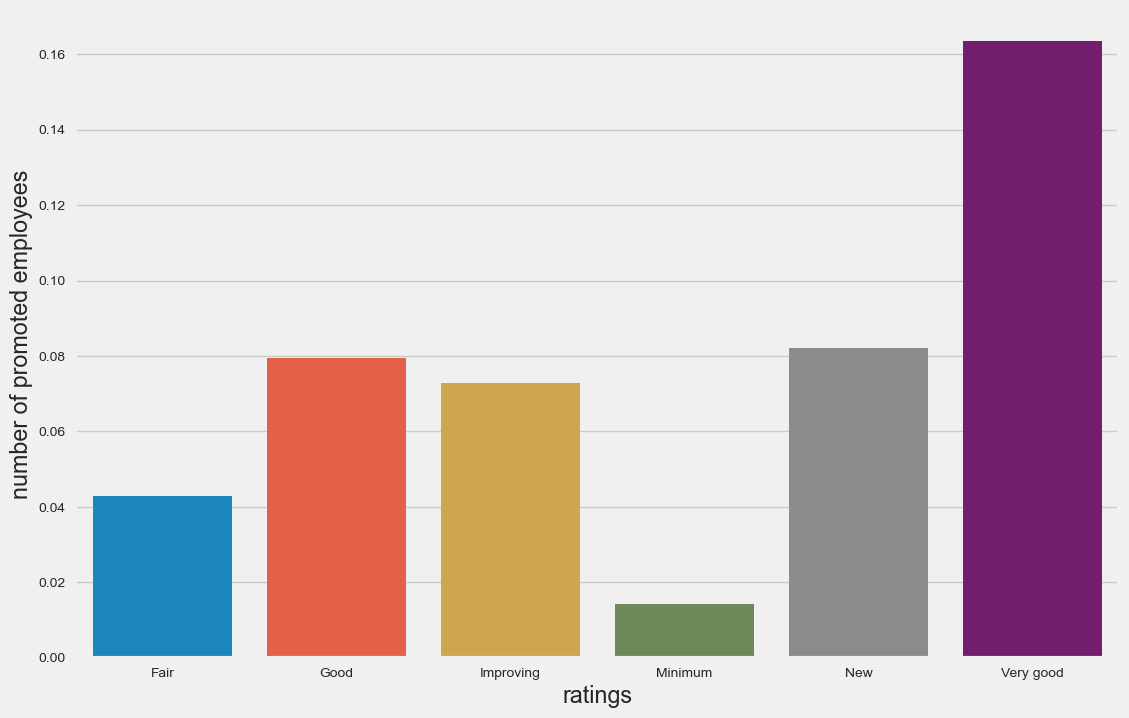

In [31]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.barplot(
    x=ratings.index,
    y=ratings.is_promoted
)
plt.ylabel('number of promoted employees')
plt.xlabel('ratings')

C:\Users\parth.parikh1\AppData\Local\Temp\ipykernel_15928\3619981637.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
C:\Users\parth.parikh1\AppData\Local\Temp\ipykernel_15928\3619981637.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6,2,1)
C:\Users\parth.parikh1\AppData\Local\Temp\ipykernel_15928\3619981637.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6,2,2)
C:\Users\parth.parikh1\AppData\Local\Temp\ipykernel_15928\3619981637.py:11: Matplotlib

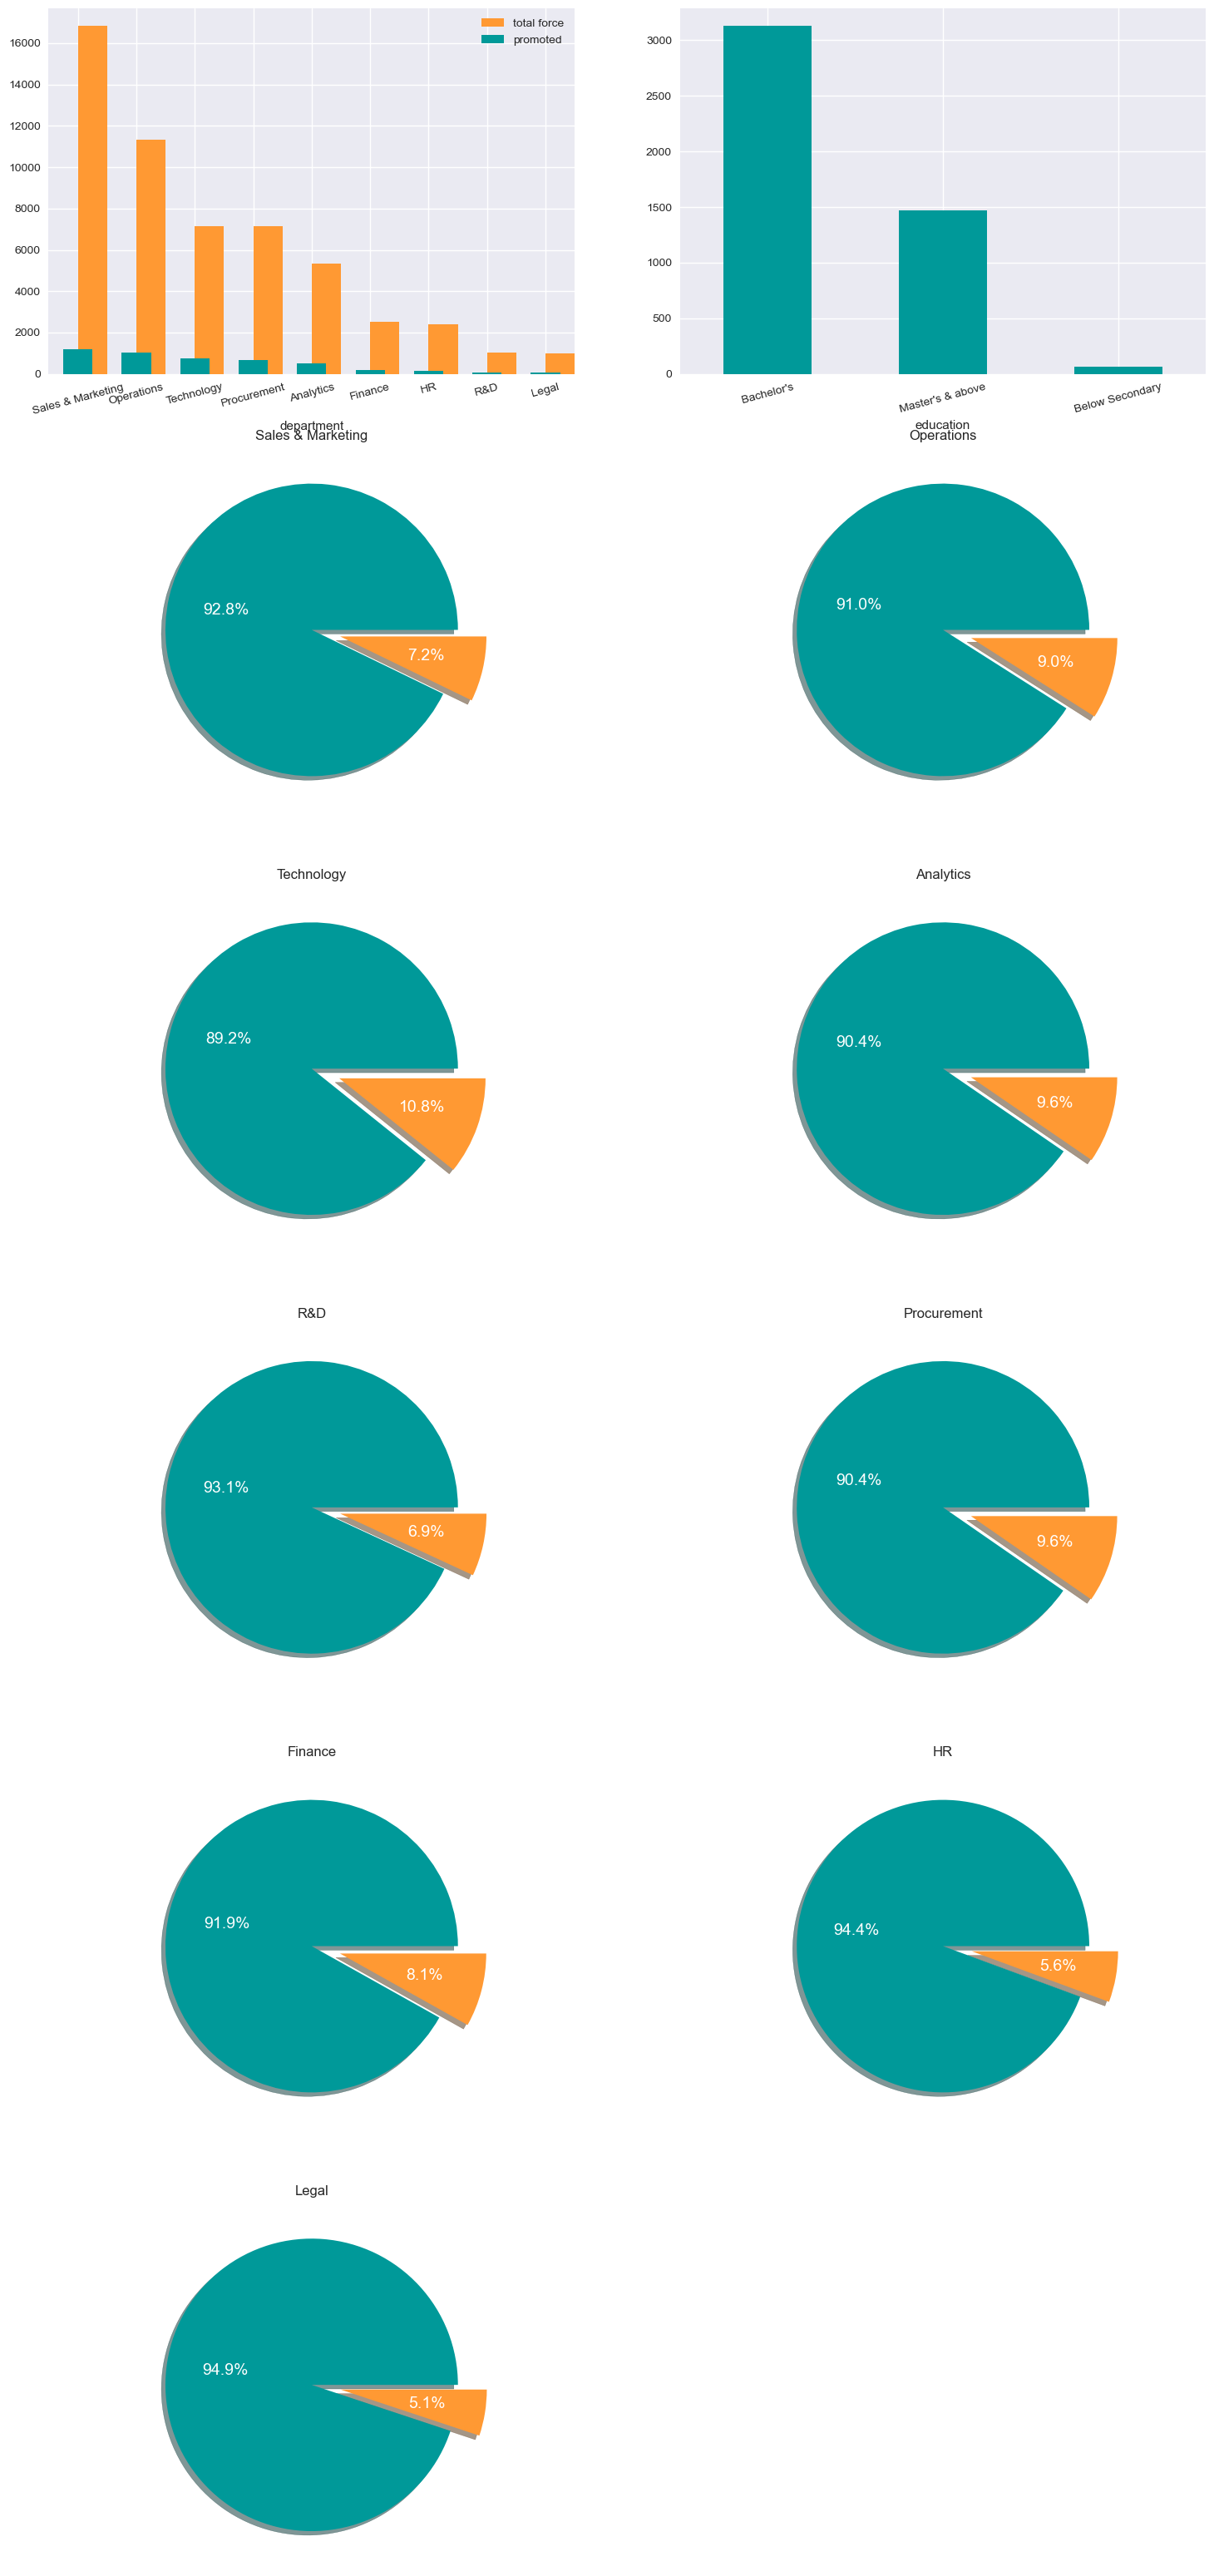

In [32]:
plt.style.use('seaborn')
fig,ax = plt.subplots(2,2,figsize=(16,38))
plt.subplot(6,2,1)
df.department.value_counts().plot.bar(color='#ff9933',align='edge')
df[df.is_promoted == 1].department.value_counts().plot.bar(color='#009999',rot=15,align='center')
plt.legend(['total force','promoted'])
plt.subplot(6,2,2)
df[df.is_promoted == 1].education.value_counts().plot.bar(rot=15,color='#009999')

for ind,dept in enumerate(df.department.unique()):
    plt.subplot(6,2,ind+3)
    plt.title(dept)
    plt.pie(
        x=df[df.department==dept].is_promoted.value_counts(normalize=True),
        labels=['not promoted','promoted'],
        explode=[0,0.2],
        autopct="%1.1f%%",
        shadow=True,
        textprops=dict(color='w',fontsize=14),
        colors=['#009999','#ff9933']
    )

The extensive analysis conducted, led to the following conclusions on this dataset :-

The performance column which is an amalgamation of KPIs_met and awards_won is a good factor to predict which employees get promoted, but it is not the only factor.
The average training score and the number of trainings attended combine to give the total training score. Employees with Mediocre or High score are likely to be promoted.
Gender as a factor has no effect on the promotions of the employee, both the genders had about equal percentages of representatives from the two sets.
The Age and Service categories give a temporal factor for the employees. Employees who are Middle aged and Established or Experienced have high chances of being promoted. The other categories within these proves that Age and Service length are not the only factors affecting promotion.
The most important factor amongst all is the previous year rating the employee recieved. The chances of promotions increase as the rating increases for an employee. New employees, that have 0 ratings also have a chance at promotion as, these ratings are not the only contributing factor.
Department and Education of an employee hardly gives much insight into which employee is likely to be promoted.

In [33]:
rm_cols = [
    'employee_id',
    'department',
    'region',
    'education',
    'gender',
    'recruitment_channel',
    'KPIs_met',
    'awards_won',
    'total_score_label',
    'service_catg',
    'age_label',
    'rating_label'
]

df.drop(rm_cols,axis=1,inplace=True)
df.head(5)

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,is_promoted,performance,total_score
0,1,35,5.0,8,49,0,True,49
1,1,30,5.0,4,60,0,False,60
2,1,34,3.0,7,50,0,False,50
3,2,39,1.0,10,50,0,False,100
4,1,45,3.0,2,73,0,False,73


In [34]:
df.performance = df.performance.apply(lambda x: 1 if x else 0)

is_promoted
0    50140
1     4668
Name: count, dtype: int64


<Figure size 1200x800 with 0 Axes>

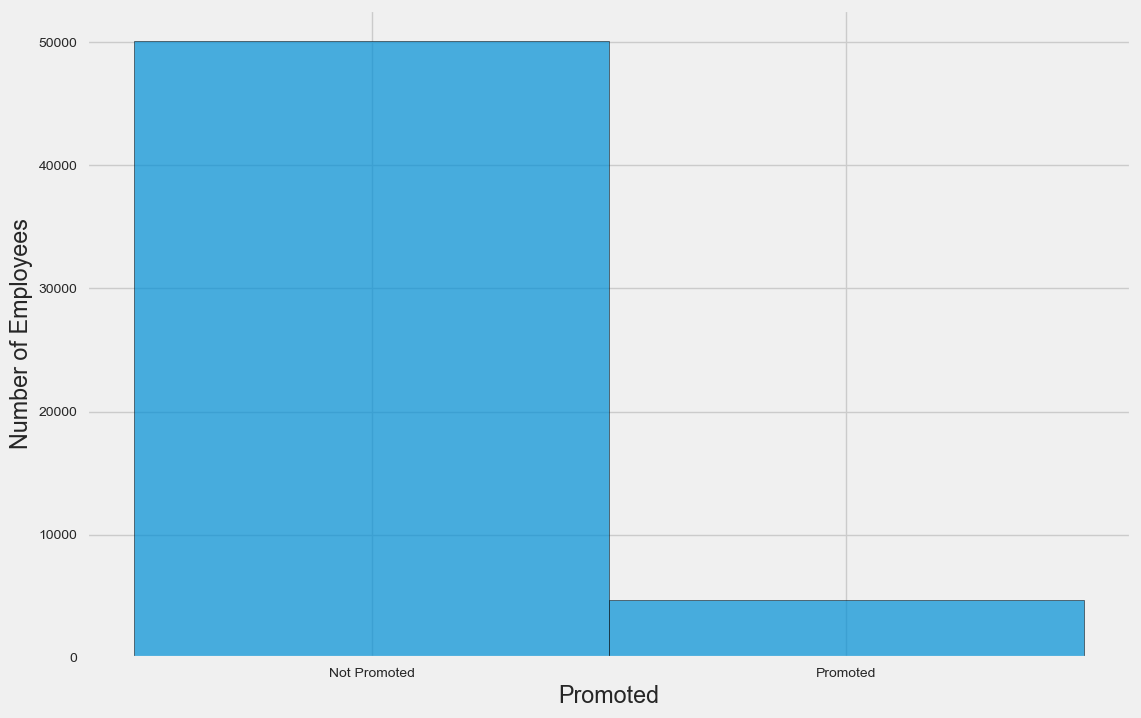

In [35]:
print(df.is_promoted.value_counts())

plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
plt.hist(df.is_promoted, bins=2, edgecolor='black', alpha=0.7)
plt.xlabel('Promoted')
plt.ylabel('Number of Employees')
plt.xticks([0.25, 0.75], ['Not Promoted', 'Promoted'])
plt.show()

In [36]:
X = df.drop('is_promoted',axis=1)
y = df.is_promoted

cols = X.columns

resampler = RandomOverSampler(random_state=1)
X_res,y_res = resampler.fit_resample(X,y)
print(X_res.shape)
print(y_res.value_counts())

(100280, 7)
is_promoted
0    50140
1    50140
Name: count, dtype: int64


In [37]:
scaler = MinMaxScaler()
X_res = pd.DataFrame(scaler.fit_transform(X_res))
X_res.head(5)

,0,1,2,3,4,5,6
0,0.000000,0.375,1.0,0.194444,0.166667,1.0,0.014903
1,0.000000,0.250,1.0,0.083333,0.350000,0.0,0.031297
2,0.000000,0.350,0.6,0.166667,0.183333,0.0,0.016393
3,0.111111,0.475,0.2,0.250000,0.183333,0.0,0.090909
4,0.000000,0.625,0.6,0.027778,0.566667,0.0,0.050671


low recall + high precision : the model can’t detect the class well but is highly trustable when it does.
high recall + low precision : the class is well detected but the model also include points of other classes in it

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,random_state=0)

In [39]:
scores = cross_validate(
    GradientBoostingClassifier(max_depth=10,random_state=0),
    X_res,
    y_res,
    cv=5,
    scoring=['accuracy','precision_macro','recall_macro','f1'],
    verbose=2
)
print('Avg Test score: ',np.mean(scores['test_accuracy']))
print('Avg Precision: ',np.mean(scores['test_precision_macro']))
print('Avg Recall: ',np.mean(scores['test_recall_macro']))
print('Avg F1 score: ',np.mean(scores['test_f1']))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  20.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.2s remaining:    0.0s


[CV] END .................................................... total time=  20.8s
[CV] END .................................................... total time=  25.4s
[CV] END .................................................... total time=  44.2s
[CV] END .................................................... total time=  27.8s
Avg Test score:  0.873294774631033
Avg Precision:  0.8848476260377431
Avg Recall:  0.873294774631033
Avg F1 score:  0.8833983604998666


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.3min finished


In [40]:
params = np.arange(10,26,1)
scores = validation_curve(
    GradientBoostingClassifier(),
    X_res,
    y_res,
    param_name='max_depth',
    param_range=params,
    scoring='accuracy',
    verbose=3,
    cv=3
)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ......max_depth=10;, score=(train=0.898, test=0.870) total time=  22.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.6s remaining:    0.0s


[CV] END ......max_depth=11;, score=(train=0.928, test=0.896) total time=  27.4s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   52.8s remaining:    0.0s


[CV] END ......max_depth=12;, score=(train=0.951, test=0.918) total time=  30.3s
[CV] END ......max_depth=13;, score=(train=0.968, test=0.935) total time=  34.0s
[CV] END ......max_depth=14;, score=(train=0.971, test=0.940) total time=  39.3s
[CV] END ......max_depth=15;, score=(train=0.974, test=0.945) total time=  50.6s
[CV] END ......max_depth=16;, score=(train=0.974, test=0.947) total time=  58.7s
[CV] END ......max_depth=17;, score=(train=0.974, test=0.949) total time= 1.2min
[CV] END ......max_depth=18;, score=(train=0.974, test=0.949) total time= 1.2min
[CV] END ......max_depth=19;, score=(train=0.974, test=0.949) total time= 1.4min
[CV] END ......max_depth=20;, score=(train=0.974, test=0.949) total time= 1.6min
[CV] END ......max_depth=21;, score=(train=0.974, test=0.950) total time= 2.3min
[CV] END ......max_depth=22;, score=(train=0.974, test=0.949) total time= 2.0min
[CV] END ......max_depth=23;, score=(train=0.974, test=0.948) total time= 1.9min
[CV] END ......max_depth=24;

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 60.9min finished


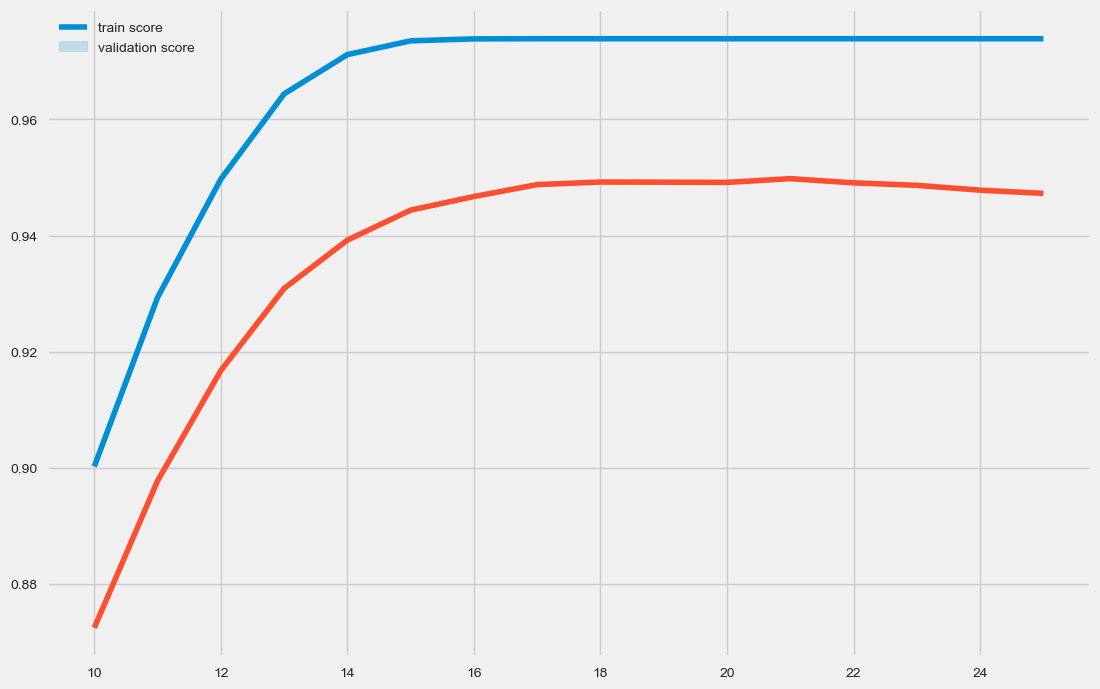

In [41]:
train_scores = scores[0]
test_scores = scores[1]

train_means = np.mean(train_scores,axis=1)
test_means = np.mean(test_scores,axis=1)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.lineplot(x=params,y=train_means)
sns.lineplot(x=params,y=test_means)
plt.legend(['train score','validation score'])

In [42]:
model = GradientBoostingClassifier(max_depth=20,random_state=0)
grid_vals ={
    'learning_rate':np.arange(0.1,0.5,0.1),
    'n_estimators':np.arange(100,500,100)
}
grid_mod = GridSearchCV(model,param_grid=grid_vals,cv=3,verbose=1)
grid_mod.fit(X_train,y_train)
print(grid_mod.best_params_)
print(grid_mod.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'learning_rate': 0.1, 'n_estimators': 400}
0.9419359127775562


In [43]:
#Applying Gradient Boosting Classifier
model = GradientBoostingClassifier(learning_rate=0.4,n_estimators=300,max_depth=20,random_state=0)
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9738066746443292
0.9566812923813323


In [44]:
pred = model.predict(X_test)
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     11403
           1       1.00      0.92      0.96     13667

    accuracy                           0.96     25070
   macro avg       0.96      0.96      0.96     25070
weighted avg       0.96      0.96      0.96     25070

